In [82]:
import pandas as pd
from scipy import integrate
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,5)

# read elapsed_time_ms and current_mA

In [29]:
data_frame = pd.read_csv("tcp_as.csv", sep=" ", names=["elapsed_time_ms", "current_mA"])
data_frame.describe()

,elapsed_time_ms,current_mA
count,100.000000,100.000000
mean,241.570000,0.021031
std,32.115403,0.002591
min,193.000000,0.016300
25%,219.000000,0.019175
50%,236.000000,0.020600
75%,257.000000,0.022325
max,396.000000,0.032600


In [30]:
data_frame = pd.read_csv("udp_as.csv", sep=" ", names=["elapsed_time_ms", "As"])
data_frame.describe()

,elapsed_time_ms,As
count,100.000000,100.000000
mean,95.970000,0.009227
std,1.058444,0.000581
min,94.000000,0.008200
25%,95.000000,0.008800
50%,96.000000,0.009100
75%,97.000000,0.009600
max,98.000000,0.010900


In [10]:
def calc_AmpereSecFromDataFrame(df):
    return integrate.trapz(df.current_mA.div(1000), df.time_ms.div(1000))


def calc_load_coulomb_str(df):
    load = calc_AmpereSecFromDataFrame(df)
    return "Q = {:.4f} As".format(load)

# Sending data over tcp

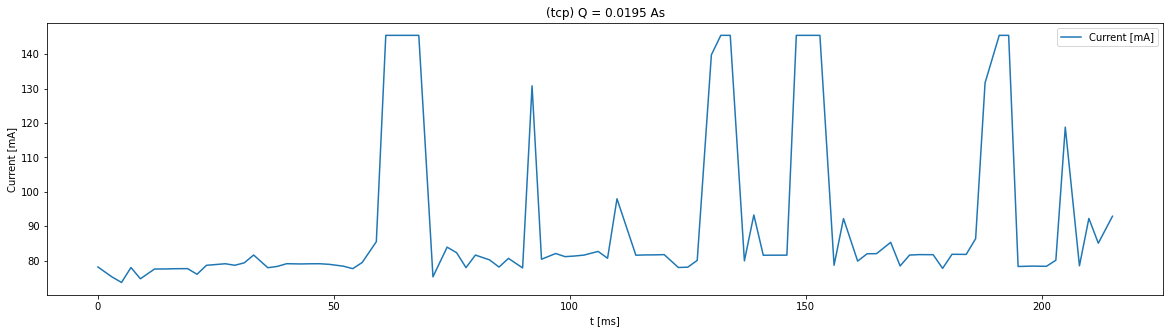

In [95]:
df_tcp = pd.read_csv("tcp/tcp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("(tcp) " + calc_load_coulomb_str(df_tcp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

# Sending data over udp

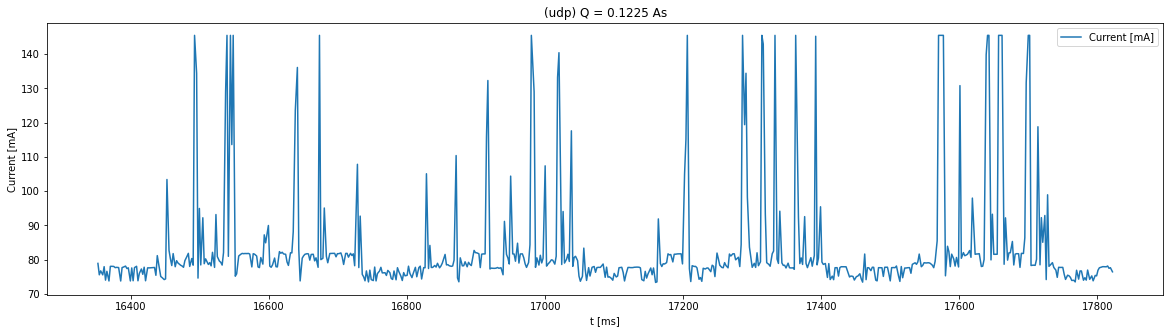

In [102]:
df_udp = pd.read_csv("udp/udp_50.csv", sep=" ", names=["time_ms", "current_mA"])
plt.title("(udp) " + calc_load_coulomb_str(df_tcp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_tcp.time_ms[:], df_tcp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()

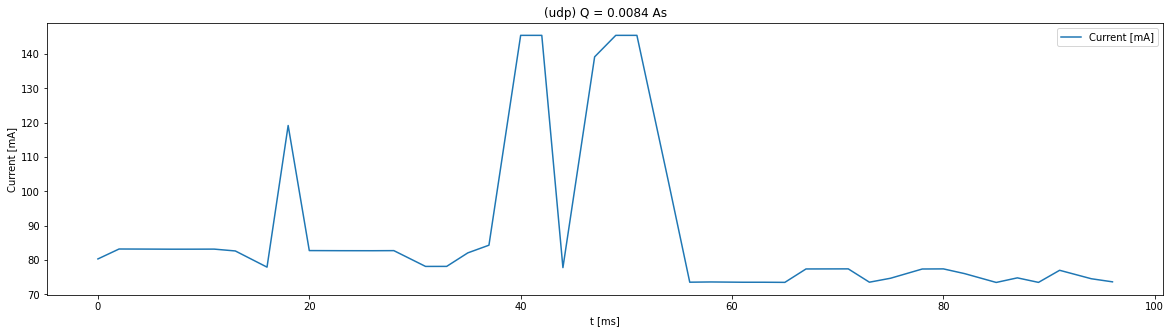

In [97]:
df_tcp = pd.read_csv("tcp_49_51.csv", sep=" ",  names=["time_ms", "current_mA", "is_sending"])
plt.title("(udp) " + calc_load_coulomb_str(df_udp))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_udp.time_ms[:], df_udp.current_mA[:], label="Current [mA]")
plt.legend()
plt.show()


# Light sleep

In [23]:
df_light_sleep = pd.read_csv("light_sleep.csv", sep=" ", names=["time_ms", "current_mA"])
df_light_sleep.describe()

,time_ms,current_mA
count,5771.000000,5770.000000
mean,5987.733495,36.119192
std,3477.598933,37.344620
min,1.000000,0.872730
25%,2975.000000,1.177270
50%,5976.000000,17.390910
75%,8987.500000,78.412503
max,12061.000000,145.454540


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


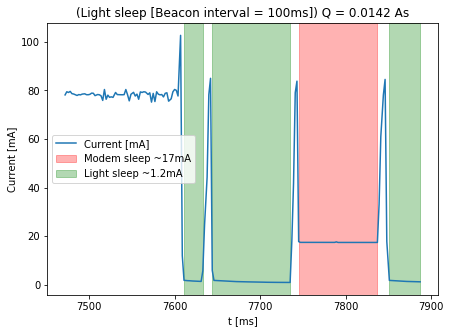

In [58]:
df_light_sleep_short = df_light_sleep[3600:3800]
plt.title("(Light sleep [Beacon interval = 100ms]) " + calc_load_coulomb_str(df_light_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_light_sleep_short.time_ms[:, None], df_light_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(7745, 7837, color='red', alpha=0.3, label="Modem sleep ~17mA")
plt.axvspan(7611, 7633, color='green', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(7644, 7735, color='green', alpha=0.3)
plt.axvspan(7851, 7887, color='green', alpha=0.3)
plt.legend()
plt.show()

# Deep sleep

In [72]:
df_deep_sleep = pd.read_csv("deep_sleep.csv", sep=" ", names=["time_ms", "current_mA"])
df_deep_sleep.describe()

,time_ms,current_mA
count,16687.000000,16687.000000
mean,17620.706658,49.212474
std,10278.288107,38.886063
min,12.000000,0.000000
25%,8702.500000,0.040910
50%,17577.000000,78.550000
75%,26491.000000,79.122730
max,35490.000000,145.454540


/Users/DEV/miniconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


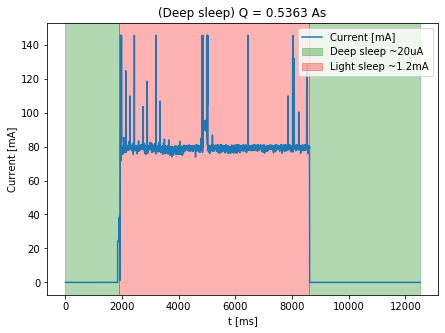

In [89]:
df_deep_sleep_short = df_deep_sleep[0:6000]
plt.title("(Deep sleep) " + calc_load_coulomb_str(df_deep_sleep_short))
plt.xlabel("t [ms]")
plt.ylabel("Current [mA]")
plt.plot(df_deep_sleep_short.time_ms[:, None], df_deep_sleep_short.current_mA[:, None], label="Current [mA]")
plt.axvspan(0, 1900, color='green', alpha=0.3, label="Deep sleep ~20uA")
plt.axvspan(1900, 8600, color='red', alpha=0.3, label="Light sleep ~1.2mA")
plt.axvspan(8600, 12500, color='green', alpha=0.3)
plt.legend()
plt.show()